In [ ]:
import pandas as pd
import matplotlib as pt
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data
import bs4 as bs
import pickle
import requests
!pip install yfinance
import yfinance as yf

In [ ]:
start_date = input("Give a start date yyyy-mm-dd : ")
end_date= input("Give an end date as yyyy-mm-dd : ")

Give a start date yyyy-mm-dd : 2018-01-01
Give an end date as yyyy-mm-dd : 2018-12-31


In [ ]:
start_str = start_date
end_str = end_date

In [ ]:
start_int = [int(x)for x in start_date.split("-")]
end_int = [int(x)for x in end_date.split("-")]

In [ ]:
start_date = datetime.datetime(start_int[0], start_int[1], start_int[2])
end_date = datetime.datetime(end_int[0], end_int[1], end_int[2] )

# Importing Data

In [ ]:
import bs4 as bs
import requests

import datetime

resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})
tickers = []
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    tickers.append(ticker)

tickers = [s.replace('\n', '') for s in tickers]
start = start_date
end = end_date
data = yf.download(tickers, start=start, end=end)
print(data)

[*********************100%***********************]  505 of 505 completed

11 Failed downloads:
- CARR: Data doesn't exist for startDate = 1514764800, endDate = 1546214400
- DOW: Data doesn't exist for startDate = 1514764800, endDate = 1546214400
- CTVA: Data doesn't exist for startDate = 1514764800, endDate = 1546214400
- VIAC: Data doesn't exist for startDate = 1514764800, endDate = 1546214400
- BRK.B: No data found, symbol may be delisted
- HWM: No data found for this date range, symbol may be delisted
- OTIS: Data doesn't exist for startDate = 1514764800, endDate = 1546214400
- FOXA: Data doesn't exist for startDate = 1514764800, endDate = 1546214400
- NLOK: No data found for this date range, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted
- FOX: Data doesn't exist for startDate = 1514764800, endDate = 1546214400
            Adj Close                         ...    Volume                      
                    A        AAL         AAP  ...




# TO-DO LIST

You could make the reports by day, by week, by month |
Plotting & charting everything *italicized text*
1. Most and Least volatility
2. Best 5 and Worst 5
3. Most Actively Traded, Least Actively Traded – by using volume
4. Fix portfolio valuation bug and 


# Most Actively Traded, Least Actively Traded – by using volume

             Total volume
Volume AMCR     2226700.0
             Total volume
Volume AAPL  3.401613e+10


Text(0, 0.5, 'Volume')

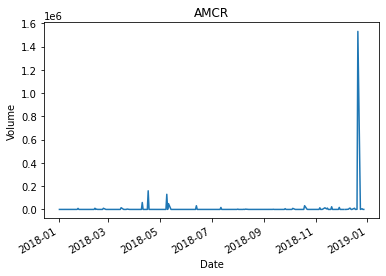

In [ ]:
# Most Actively Traded, Least Actively Traded – by using volume

# get the Volume columns, and then get rows from start_date to end_date
df_volume = data[[ 'Volume' ]].loc[start_date : end_date]

# for each column, sum over rows, convert to DataFrame
df_total = df_volume.sum(axis=0).to_frame()  

# assign a column name
df_total.columns = ['Total volume']

# remove rows of 0 volume, sort Series on volume, drop NaN rows
df_total = df_total[df_total > 0].sort_values(by='Total volume', ascending=True).dropna()

# get the least and most actively traded stocks
least_active = df_total.head(1)
most_active = df_total.tail(1)
print(least_active)
print(most_active)

# plot the volume of the two stocks between the two dates
stock1 = least_active.loc['Volume'].index[0]
stock2 = most_active.loc['Volume'].index[0]

df_s1 = df_volume['Volume'][stock1]
df_s2 = df_volume['Volume'][stock2]

df_s1.plot(title=stock1)
plt.ylabel('Volume')

Text(0, 0.5, 'Volume')

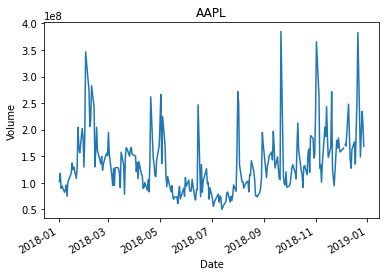

In [ ]:
df_s2.plot(title=stock2)
plt.ylabel('Volume')

# Highest and Lowest 5 returns


In [ ]:
data.loc['2018-01-02']['Adj Close']['AAPL']


41.513580322265625

In [ ]:

new_df = data.loc['2018-01-02']['Adj Close']
df2 = data.loc['2018-04-02']['Adj Close']
df = pd.concat([new_df, df2], axis=1)
df['return'] = df.apply(calculate_ret, axis=1)
df

2018-01-02 00:00:00  2018-04-02 00:00:00     return
A               66.104866            63.145615   4.476601
AAL             51.647556            48.612186   5.877083
AAP            105.086594           110.929123  -5.559729
AAPL            41.513580            40.332607   2.844787
ABBV            84.853157            79.426239   6.395658
...                   ...                  ...        ...
YUM             77.736656            80.144905  -3.097958
ZBH            121.542229           104.471779  14.044871
ZBRA           103.709999           137.399994 -32.484809
ZION            47.003399            47.808563  -1.712992
ZTS             70.577362            79.991776 -13.339140

[505 rows x 3 columns]

In [ ]:
'''
dates are all strings
'''

def topBottom_5(data, start_date, end_date):
    
    # get all the close prices
    new_df = data.loc['2018-01-02']['Adj Close']
    df2 = data.loc['2018-12-10']['Adj Close']
    df = pd.concat([new_df, df2], axis=1)


    # make a new column
    def calculate_ret(row):
      d1= start_date
      d2 = end_date
      return (row[d1]-row[d2]) * 100 / row[d1]

    df['returns'] = df.apply(calculate_ret, axis=1)

    # return the top 5 ticker names
    df = df.sort_values('returns')
    df = df.dropna()
    
    final_df = [df.tail(5), df.head(5)]
    return final_df

topBottom_5(data, '2018-01-02', '2018-12-10')   

[      2018-01-02 00:00:00  2018-12-10 00:00:00    returns
 IVZ             30.432920            15.948657  47.594063
 WDC             74.649712            39.004066  47.750546
 MHK            276.000000           119.980003  56.528984
 COTY            18.085350             7.185560  60.268617
 GE              16.684486             6.610844  60.377299,
       2018-01-02 00:00:00  2018-12-10 00:00:00     returns
 DXCM            57.990002           123.449997 -112.881520
 AMD             10.980000            19.990000  -82.058293
 FTNT            44.349998            74.699997  -68.432919
 ABMD           192.490005           323.660004  -68.143797
 PAYC            80.440002           131.720001  -63.749375]

# Most volatile Stocks

In [ ]:
volatility = data.rolling(20).std()

In [ ]:
volatility.mean().sort_values(ascending=False)[:5]

Volume  GE      3.708825e+07
        AAPL    3.443907e+07
        AMD     2.993076e+07
        BAC     1.664955e+07
        F       1.292645e+07
dtype: float64

In [ ]:
volatility.mean().sort_values(ascending=True)[:5]

Low        F       0.231862
Adj Close  F       0.232369
Open       F       0.232601
Adj Close  AMCR    0.233156
High       F       0.234055
dtype: float64

<IPython.core.display.Javascript object>


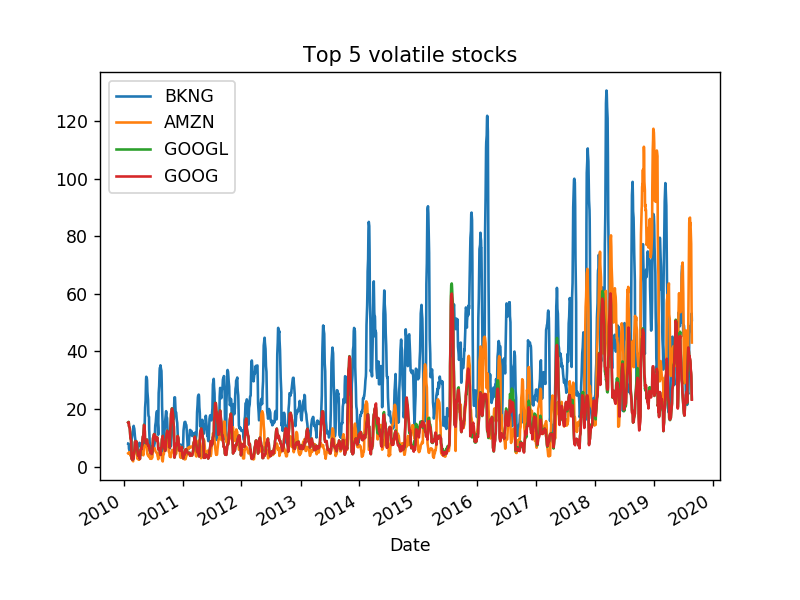

In [ ]:
volatility[['BKNG','AMZN','GOOGL','GOOG']].plot(  title="Top 5 volatile stocks")

<IPython.core.display.Javascript object>


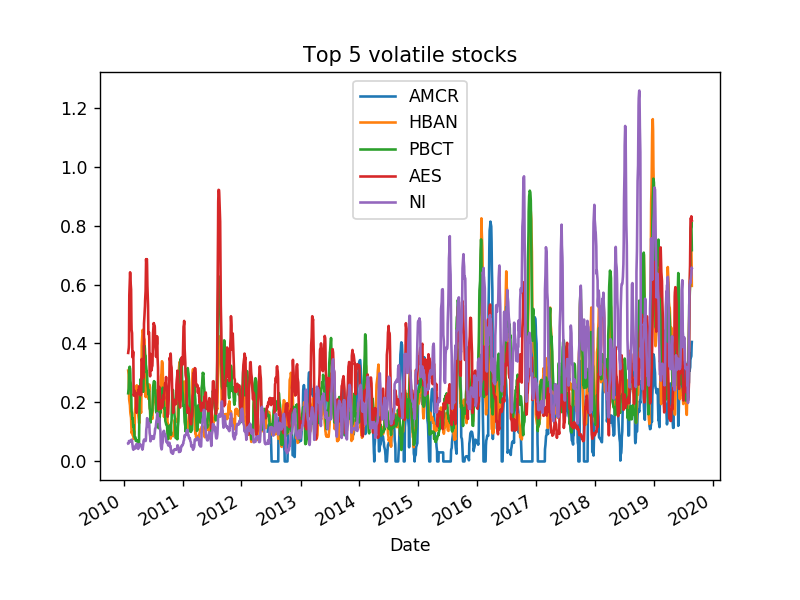

In [ ]:
volatility[['AMCR','HBAN','PBCT','AES','NI']].plot(  title="Top 5 volatile stocks")